In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Adithi
[nltk_data]     Satish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset = pd.read_csv("finalData.csv")
dataset.drop_duplicates(subset='description',inplace=True,keep=False)
dataset.count()

Unnamed: 0     30118
index          30118
description    30118
category       15234
civic_issue    30118
dtype: int64

In [3]:
'''index=0
count = 0
for i in dataset.description:
    #print(index)
    if "#AirtelPayment" in i or "register now" in i:
        dataset = dataset.drop(labels = index)

    index+=1
#print(count)
dataset.count()'''

'index=0\ncount = 0\nfor i in dataset.description:\n    #print(index)\n    if "#AirtelPayment" in i or "register now" in i:\n        dataset = dataset.drop(labels = index)\n\n    index+=1\n#print(count)\ndataset.count()'

In [4]:
# dataset.to_csv("finalData.csv")

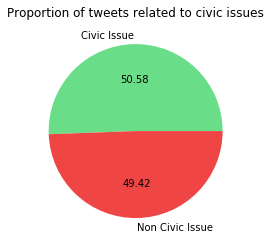

In [5]:
plt.figure(figsize=(6,4))
plt.title("Proportion of tweets related to civic issues")
plt.pie(dataset.civic_issue.value_counts(), labels=["Civic Issue","Non Civic Issue"],autopct="%0.2f",colors=["#6add89","#f04545"])
plt.show()

In [6]:
civic = dataset[dataset["civic_issue"]==1]
civic.count()

Unnamed: 0     15234
index          15234
description    15234
category       15234
civic_issue    15234
dtype: int64

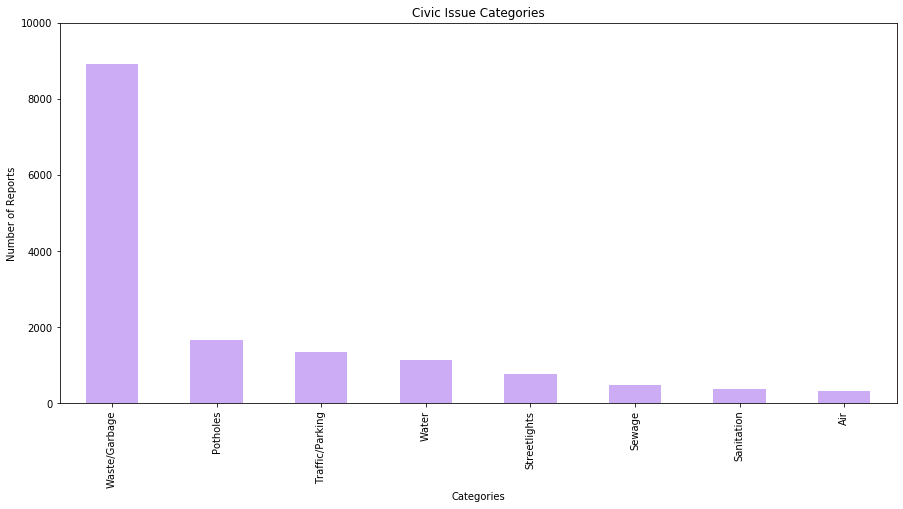

In [9]:
plt.figure(figsize=(15,7))
plt.title("Civic Issue Categories")
data = civic.category.value_counts()[:-2]
# for i in data:
#     print(i)

ax = data.plot(kind='bar',color='#cdacf6')
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Reports')
ax.set_ylim(0,10000)
plt.show()

In [8]:
for value in x:
    print(value)

NameError: name 'x' is not defined

## WordCloud for description/tweets

<ipython-input-9-b409bceaa352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].str.lower()


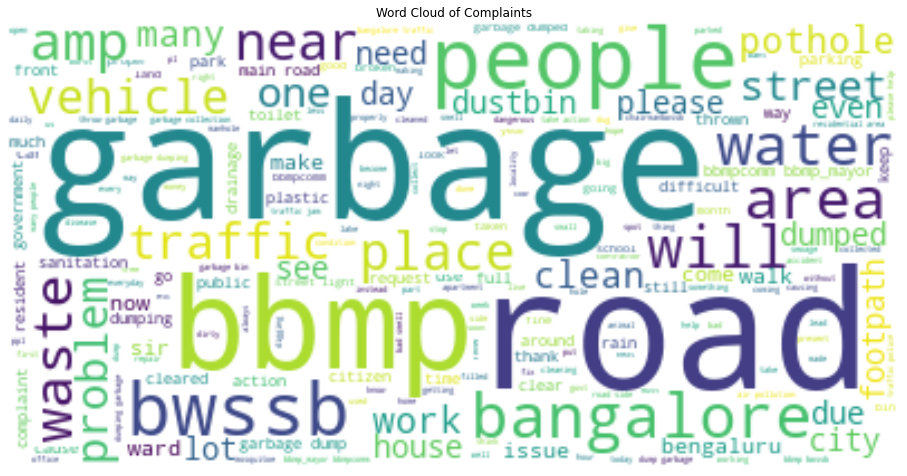

In [9]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)
        
    #removing stopwords
    stop = stopwords.words('english')
    df['description'].apply(lambda x: [item for item in x if item not in stop])

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(civic)

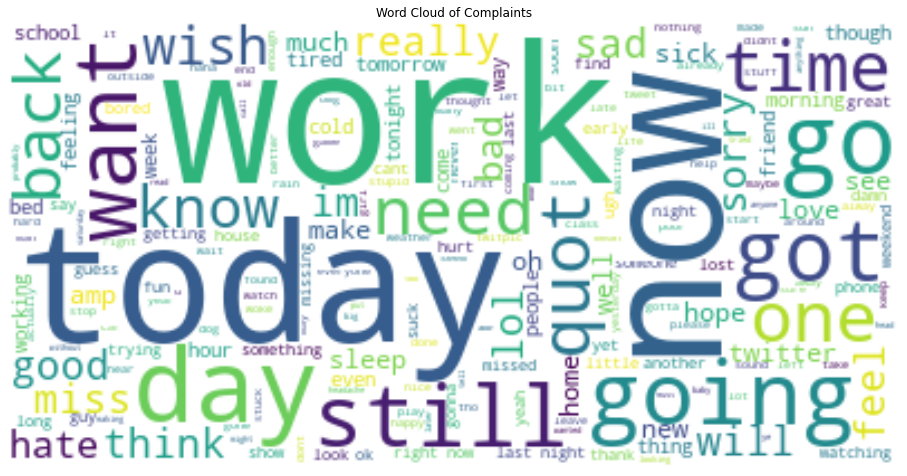

In [10]:
non_civic = pd.DataFrame()
l = []
k = 0
for i in dataset['civic_issue']:
    if i == 0:
        l.append(dataset['description'][k])
    k += 1
    
non_civic['description'] = l
word_cloud(non_civic)